<a href="https://colab.research.google.com/github/Gogulaanand/Fault-Diagnosis/blob/master/Fault_Diagnosis(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf                                    #importing neccessary libraries and functions 
import numpy as np
import random as rn
np.random.seed(1132)
tf.set_random_seed(1503)
rn.seed(654)
from tensorflow.keras import layers
import pandas as pd
import io
import keras
from keras.layers import Dense,Dropout,Activation,BatchNormalization
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import MultiLabelBinarizer

Using TensorFlow backend.


In [3]:
from google.colab import files                                  #uploading the file 
uploaded=files.upload()

Saving projdata3.csv to projdata3.csv


In [4]:
df=pd.read_csv(io.StringIO(uploaded['projdata3.csv'].decode("utf-8")),engine='python',sep=",")  #reading the data from the uploaded file
ds=df.sample(frac=1)                                                                                #shuffling the data

# y=ds.as_matrix(columns=ds.columns[4:7])                                                    #seggregate the date into X,Y variables based on columns
Y=list(zip(ds.F1,ds.F2))
X=ds.as_matrix(columns=ds.columns[1:4])

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
mlb=MultiLabelBinarizer(classes=[0,1,2,3,4])
Y_train=mlb.fit_transform(Y_train)
Y_test=mlb.fit_transform(Y_test)

# Y_train=to_categorical(Y_train,num_classes=4,dtype='int32')
# Y_test=to_categorical(Y_test,num_classes=4,dtype='int32')
print(Y_train)

[[0 0 1 0 1]
 [1 0 0 0 0]
 [0 0 0 1 1]
 ...
 [0 1 0 0 1]
 [1 0 0 0 0]
 [0 1 0 0 1]]


In [0]:
import os
os.environ['PYTHONHASHSEED']='0'

In [0]:
model=tf.keras.Sequential()  #defining the structure of the ANN model

model.add(tf.layers.Dense(10,input_shape=(3,)))      #input layer
keras.initializers.he_uniform(seed=153)
# model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.2))
model.add(tf.layers.Dropout(0.2))

model.add(tf.layers.Dense(15))                       #1st hidden layer
keras.initializers.he_uniform(seed=153)
# model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.2))
model.add(tf.layers.Dropout(0.2))

model.add(tf.layers.Dense(10))                       #2nd hidden layer
keras.initializers.he_uniform(seed=153)
# model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.2))
model.add(tf.layers.Dropout(0.2))

model.add(tf.layers.Dense(10))                       #3rd hidden layer
keras.initializers.he_uniform(seed=153)
# model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.2))
model.add(tf.layers.Dropout(0.2))

model.add(tf.layers.Dense(5))                       #output layer
keras.initializers.he_uniform(seed=153)
# model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))

# bias_regularizer=tf.keras.regularizers.l2(0.01),
# model.add(layers.Dropout(0.2))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.train.AdamOptimizer(0.0005),metrics=[tf.keras.metrics.BinaryAccuracy()])
# model.save_weights('model.h5')



In [14]:
history=model.fit(X_train,Y_train,validation_split=0.20,epochs=250,batch_size=128,shuffle=False)  #training the ANN model
# model.load_weights('model.h5')

Train on 90971 samples, validate on 22743 samples
Epoch 1/250
90971/90971 [==============================] - 4s 40us/sample - loss: 2.2676 - binary_accuracy: 0.6545 - val_loss: 0.5949 - val_binary_accuracy: 0.7316
Epoch 2/250
90971/90971 [==============================] - 3s 38us/sample - loss: 0.5743 - binary_accuracy: 0.7445 - val_loss: 0.5576 - val_binary_accuracy: 0.7494
Epoch 3/250
90971/90971 [==============================] - 4s 39us/sample - loss: 0.5492 - binary_accuracy: 0.7514 - val_loss: 0.5379 - val_binary_accuracy: 0.7515
Epoch 4/250
90971/90971 [==============================] - 4s 39us/sample - loss: 0.5318 - binary_accuracy: 0.7543 - val_loss: 0.5222 - val_binary_accuracy: 0.7532
Epoch 5/250
90971/90971 [==============================] - 4s 38us/sample - loss: 0.5156 - binary_accuracy: 0.7582 - val_loss: 0.5041 - val_binary_accuracy: 0.7580
Epoch 6/250
90971/90971 [==============================] - 3s 38us/sample - loss: 0.4984 - binary_accuracy: 0.7640 - val_loss: 0.4

In [23]:
print(history.history.keys())

test_loss,test_acc=model.evaluate(X_test,Y_test,batch_size=128)                    #test data evaluation(data unseen by the ANN)
print(test_acc)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])
28429/28429 [==============================] - 1s 20us/sample - loss: 0.0296 - binary_accuracy: 0.9914
0.9913679


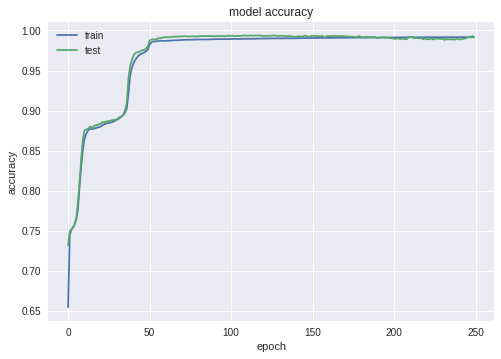

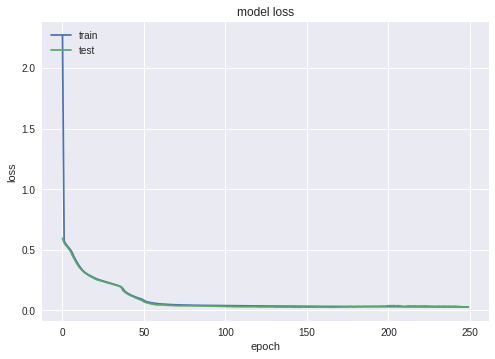

In [25]:
plt.plot(history.history['binary_accuracy'])                                                  #model accuracy plot
plt.plot(history.history['val_binary_accuracy'])
# plt.plot(test_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
                                                                                  #model loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
